# <국내 증권뉴스 데이터 자연어처리 프로젝트>

### - 국내 주식뉴스 데이터 자연어처리 프로젝트-

# 1. 주제선정

- 최근 Kospi지수가 3000을 넘어가며, 한국 국민들의 주식투자에 대한 관심이 크게 증가하고 있음.
- 주식개미들은 투자 의사결정을 위해 웹사이트의 증권뉴스를 주로 참고한다는 점에서 착안.
- 주식뉴스 및 주가데이터를 활용하여 다음과 같은 프로젝트를 진행해보고자 함.

### (1) 증권뉴스 데이터와 주가데이터를 활용한 감성분석
- 특정일의 뉴스와 해당일 주식가격을 매치하여 특정뉴스가 게시된 날의 주가의 등락을 예측해보자.

### (2) Word2vec을 활용한 유사도분석
- 2021년 여름 한국주식시장의 핫한 키워드 찾아보기

## 데이터 수집

- 수집방법: 크롤링
- 활용툴: Scrapy

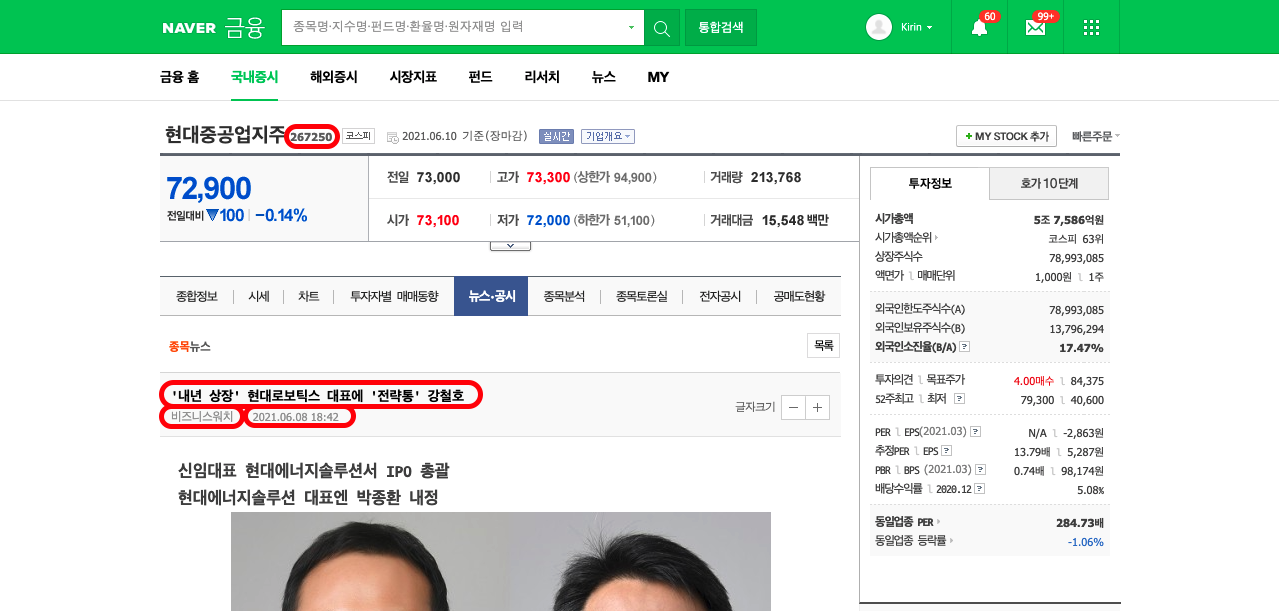

1. 주식뉴스 데이터: 네이버 증권 종목별 뉴스탭
- 주요컬럼: 종목코드/뉴스게시일/언론사/뉴스타이틀

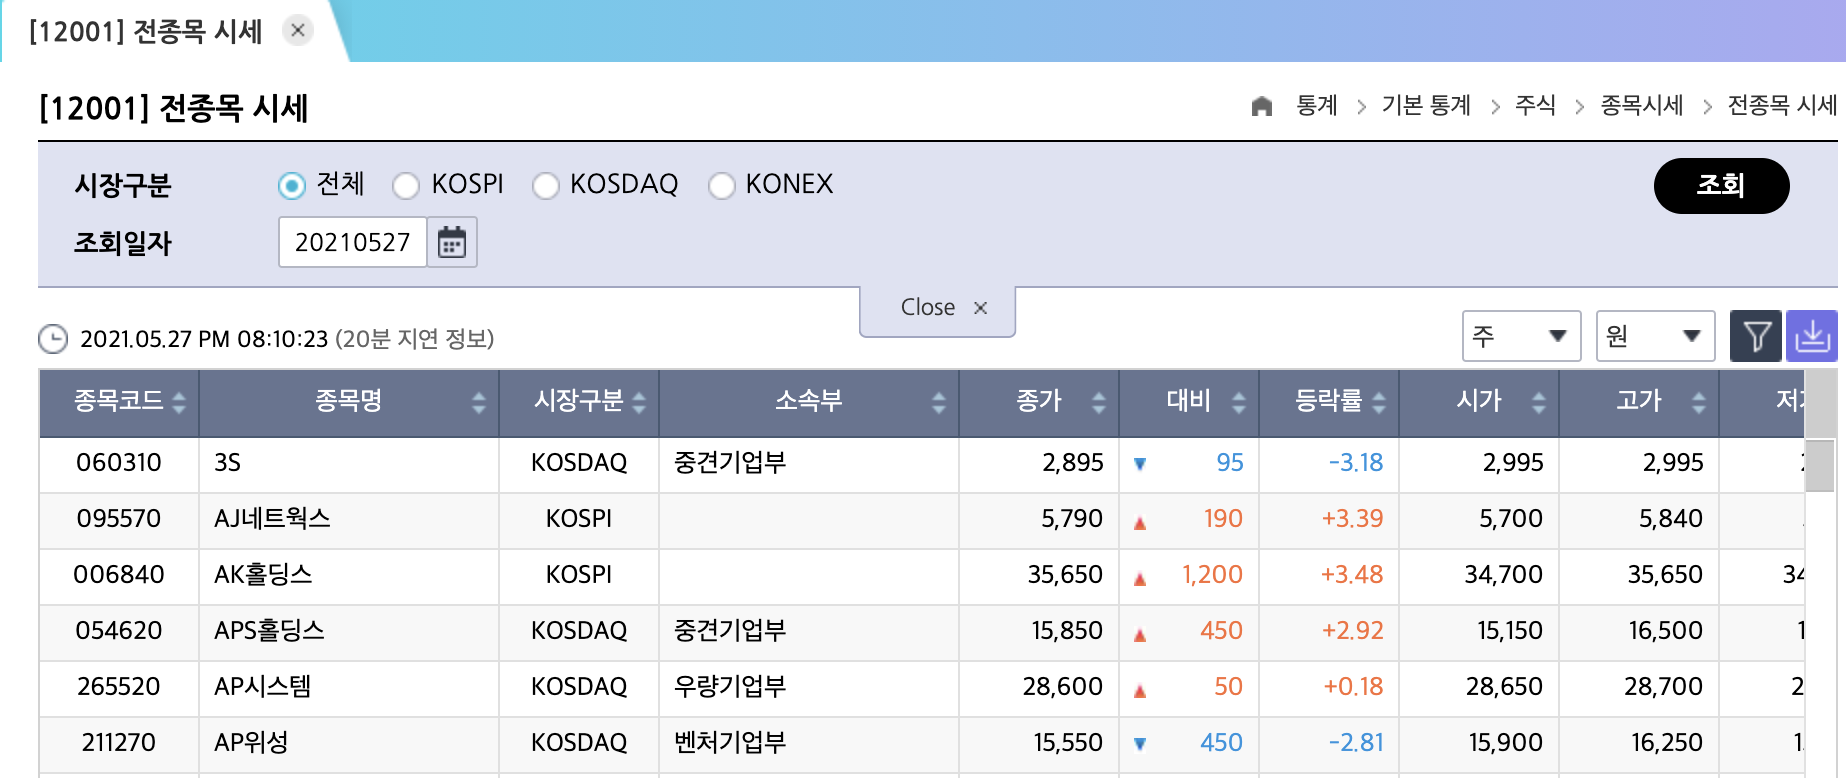

2. 국내 상장종목 주가데이터: 한국거래소 상장된 주식 전 종목 일자별 크롤링
- 주요 컬럼 : 종목코드 / 종목이름 / 일자 / 종가 / 시장구분(코스닥 + 코스피)
- 사이트 : http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020101


### 사전준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
#apt로 나눔폰트설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
# 폰트지정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, '안녕')

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0, flags=flags)


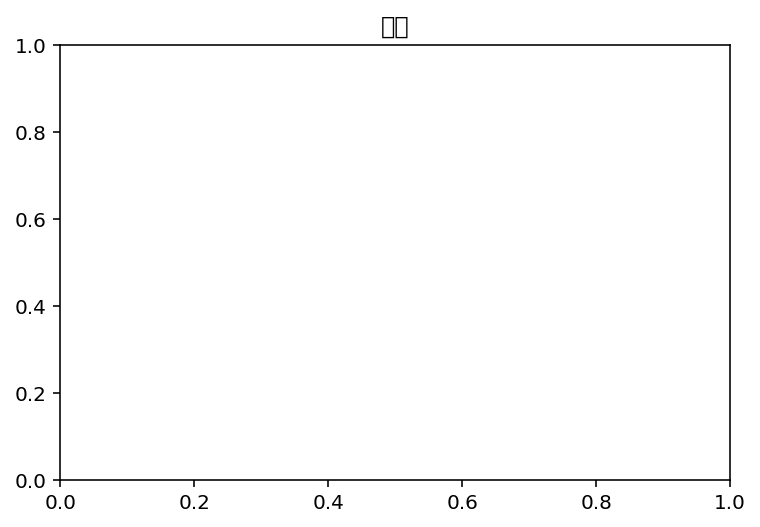

In [5]:
#retina설정 - 뚜렷하게
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

plt.title('안녕')

In [6]:
# konlpy & wordcloud 설치
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 47.2 MB/s 


In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

---

### 데이터셋 살펴보기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
stock_news = pd.read_csv('/content/drive/MyDrive/Korean_Stock_Project/stock.csv')

In [ ]:
stock_news

,date,news_link,stock,stock_code,title
0,2021.06.30 17:40,https://finance.naver.com//item/news_read.nhn?...,COWON,056000,"거래소, COWON 제재금 미납 따른 가중벌점 부과"
1,2021.06.30 10:15,https://finance.naver.com//item/news_read.nhn?...,CJ ENM,035760,"CJ ENM ""티빙, NAVER 대상 400억원 규모 3자배정 유상증자"" [주목 e공시]"
2,2021.06.30 17:24,https://finance.naver.com//item/news_read.nhn?...,CJ ENM,035760,[코스닥 공시] CJ ENM
3,2021.06.30 10:49,https://finance.naver.com//item/news_read.nhn?...,CJ ENM,035760,CJ ENM-네이버 결속 강화…티빙 4백억 투자·해외진출도 돕는다
4,2021.06.30 19:01,https://finance.naver.com//item/news_read.nhn?...,BYC,001460,"BYC, 고윤성→김대환 대표이사로 변경"
...,...,...,...,...,...
18805,2021.08.29 19:39,https://finance.naver.com//item/news_read.nhn?...,현대글로비스,086280,"현대글로비스, 협력사와 ESG경영 속도"
18806,2021.08.29 19:39,https://finance.naver.com//item/news_read.nhn?...,현대차,005380,장재훈 현대차 사장 '글로벌 4대 모터쇼' 데뷔
18807,2021.08.29 16:43,https://finance.naver.com//item/news_read.nhn?...,현대차,005380,"현대차, GV60에 통합 제어 OTA 적용...테슬라 넘는다"
18808,2021.08.29 16:56,https://finance.naver.com//item/news_read.nhn?...,효성,004800,리모델링 '시동' 건 당산 현대홈타운·효성


In [ ]:
# 타이틀 컬럼 전처리
news_title = stock_news['title']
title_list = [ str(a) for a in news_title]
text = ''

for each in title_list:
  text = text + each + '\n'



In [ ]:
# 형태소분석기 임포트
import nltk
from konlpy.tag import Okt

tf = Okt()

#명사 추출
title_tokens = tf.nouns(text)
title_tokens

In [ ]:
## 단어의 등장빈도를 보자

TT = nltk.Text(title_tokens)

print(len(set(TT.tokens)))
TT.vocab()

147153
11210


FreqDist({'거래소': 90,
          '제재': 14,
          '금': 43,
          '미납': 7,
          '가중': 3,
          '벌점': 3,
          '부과': 12,
          '티빙': 8,
          '대상': 159,
          '규모': 774,
          '자': 221,
          '배정': 61,
          '유상증자': 161,
          '주목': 257,
          '공시': 550,
          '코스닥': 275,
          '네이버': 626,
          '결속': 1,
          '강화': 156,
          '백억': 2,
          '투자': 925,
          '해외진출': 9,
          '고윤성': 1,
          '김대환': 1,
          '대표이사': 43,
          '변경': 129,
          '글로벌': 300,
          '브랜드': 155,
          '세대': 84,
          '취향': 5,
          '저격': 5,
          '감성': 8,
          '코퍼레이션': 41,
          '주가': 475,
          '날개': 39,
          '맞춤': 35,
          '건기': 20,
          '종합': 169,
          '플랫폼': 173,
          '변화': 17,
          '중': 155,
          '건설': 527,
          '인천': 21,
          '여상': 1,
          '주변': 3,
          '재개발': 17,
          '정비': 22,
          '사업': 710,
          '수주': 219,

In [ ]:
# stopword
stop_words = ['.','(',')',',',"'",'%','-','X','[',']','의','자',
              '에','안','번','호','을','이','다','만','로','가','를',
              '금','중','시','사','치','새','숨','수','척','배','초',
              '기','더','온','전','임','위','무','손','판','과','년',
              '익','눈','나','날','점','젤','스','토','또','주','등',
              '제']

TT = [word for word in TT if word not in stop_words]
TT

['거래소',
 '제재',
 '미납',
 '가중',
 '벌점',
 '부과',
 '티빙',
 '대상',
 '규모',
 '배정',
 '유상증자',
 '주목',
 '공시',
 '코스닥',
 '공시',
 '네이버',
 '결속',
 '강화',
 '티빙',
 '백억',
 '투자',
 '해외진출',
 '고윤성',
 '김대환',
 '대표이사',
 '변경',
 '글로벌',
 '브랜드',
 '세대',
 '취향',
 '저격',
 '감성',
 '코퍼레이션',
 '주가',
 '날개',
 '맞춤',
 '건기',
 '종합',
 '플랫폼',
 '변화',
 '건설',
 '규모',
 '인천',
 '여상',
 '주변',
 '재개발',
 '정비',
 '사업',
 '수주',
 '건설',
 '인천',
 '임대주택',
 '생활',
 '가전',
 '지원',
 '건설',
 '규모',
 '재개발',
 '공사',
 '수주',
 '손해',
 '보험',
 '수익',
 '지속',
 '베스트',
 '투자',
 '증권',
 '손해',
 '보험',
 '고객',
 '약속',
 '소비자',
 '중심',
 '경영',
 '앞장',
 '금융투자',
 '삼성',
 '전기',
 '영업',
 '이익',
 '역대',
 '최대',
 '전망',
 '주가',
 '실적',
 '것',
 '금융투자',
 '통합',
 '자문',
 '플랫폼',
 '서비스',
 '시작',
 '엔진',
 '중공업',
 '규모',
 '선박',
 '엔진',
 '공급',
 '계약',
 '체결',
 '글로벌',
 '해운',
 '주가',
 '고공',
 '행진',
 '주춤',
 '코스피',
 '나스닥',
 '최고',
 '행진',
 '상승',
 '출발',
 '글로벌',
 '해운',
 '리더',
 '올해',
 '주인',
 '현장',
 '사람',
 '해운',
 '산업',
 '정책',
 '선원',
 '주가',
 '흠슬',
 '반등',
 '흠슬',
 '미래',
 '호황',
 '투자',
 '통합',
 '리테일',
 '커머스',
 '통합',
 '건설',
 '상반기',
 '흥행',
 '몰이'

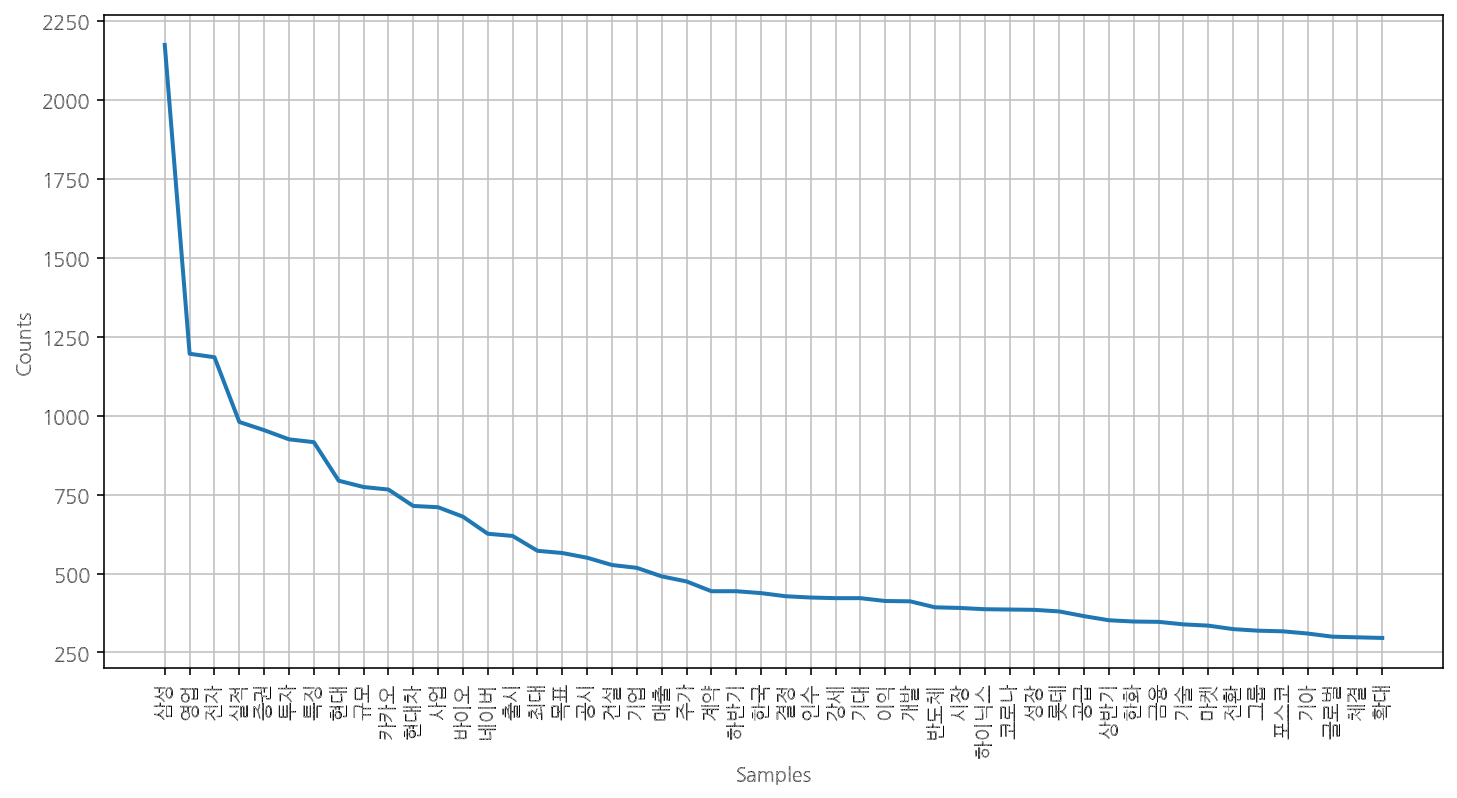

In [ ]:
# 빈도순 차트

tt = nltk.Text(TT)

plt.figure(figsize=(12,6))
tt.plot(50)
plt.show()

# <주식 뉴스데이터 감성분석>

## 예시: '광주 악몽 HDC현대산업개발, 7개월만에 또 사고…휘청' => 주가에 부정적

- 목표: 한국거래소 주가데이터와 네이버 종목별 뉴스데이터를 활용하여 특정 주식뉴스에 긍부정 나타내기
- 크롤링한 주가데이터를 활용하여 해당 뉴스가 개제된날의 주식 등락률을 0,1로 라벨링하여, 주식 뉴스 텍스트분석
- 나이브베이즈를 활용, 특정 신문기사를 입력했을 때 해당기사가 주가에 긍정적인가, 부정적인가를 보여주는 감성분석 프로젝트

In [10]:
import pandas as pd

# 크롤링한 주식뉴스 데이터 및 주가데이터 불러오기

stock_news = pd.read_csv('/content/drive/MyDrive/Korean_Stock_Project/stock.csv')
stock_price = pd.read_csv('/content/drive/MyDrive/Korean_Stock_Project/데이터.csv',index_col=0)

stock_news = stock_news.drop(['news_link'],axis=1)

In [11]:
#날짜 컬럼 합치기 쉽게 전처리
character = '.: '

for a in range(len(character)):
  stock_news['date'] = stock_news['date'].str.replace(character[a],'')

stock_news['date'] = stock_news['date'].str.slice(start=0, stop=8)
stock_news = stock_news.astype({'date':'object'})

In [12]:
# 결측치 및 문제있는값 제거
idx = stock_news[stock_news['date']=='date'].index
stock_news.drop(idx,inplace=True)

stock_news = stock_news.dropna()

In [13]:
# 주가 등락 컬럼 추가
stock_price['GoodBad'] = [0. if value.find('-')== 0 else 1. for value in stock_price['FLUC_RT']]

GB = stock_price[['ISU_SRT_CD','DATE','GoodBad']]

GB = GB.rename(columns={'DATE':'date','ISU_SRT_CD':'stock_code'})
GB = GB.astype({'date':'string'})
GB = GB.astype({'date':'object'})

GB = GB.dropna()

In [14]:
# 날짜 데이터타입 변환
stock_news['date'] = pd.to_datetime(stock_news['date'])
GB['date'] = pd.to_datetime(GB['date'])

In [15]:
GB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159593 entries, 0 to 159592
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   stock_code  159593 non-null  object        
 1   date        159593 non-null  datetime64[ns]
 2   GoodBad     159593 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.9+ MB


In [16]:
stock_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18748 entries, 0 to 18809
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        18748 non-null  datetime64[ns]
 1   stock       18748 non-null  object        
 2   stock_code  18748 non-null  object        
 3   title       18748 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 732.3+ KB


In [17]:
# 합치기
df = pd.merge(stock_news,GB,how='left',on=['date','stock_code'])
df

,date,stock,stock_code,title,GoodBad
0,2021-06-30,COWON,056000,"거래소, COWON 제재금 미납 따른 가중벌점 부과",1.0
1,2021-06-30,CJ ENM,035760,"CJ ENM ""티빙, NAVER 대상 400억원 규모 3자배정 유상증자"" [주목 e공시]",1.0
2,2021-06-30,CJ ENM,035760,[코스닥 공시] CJ ENM,1.0
3,2021-06-30,CJ ENM,035760,CJ ENM-네이버 결속 강화…티빙 4백억 투자·해외진출도 돕는다,1.0
4,2021-06-30,BYC,001460,"BYC, 고윤성→김대환 대표이사로 변경",1.0
...,...,...,...,...,...
18743,2021-08-29,현대글로비스,086280,"현대글로비스, 협력사와 ESG경영 속도",0.0
18744,2021-08-29,현대차,005380,장재훈 현대차 사장 '글로벌 4대 모터쇼' 데뷔,0.0
18745,2021-08-29,현대차,005380,"현대차, GV60에 통합 제어 OTA 적용...테슬라 넘는다",0.0
18746,2021-08-29,효성,004800,리모델링 '시동' 건 당산 현대홈타운·효성,0.0


In [18]:
df['GoodBad'].value_counts()

1.0    9573
0.0    9175
Name: GoodBad, dtype: int64

In [20]:
# df csv파일로 저장
df.to_csv('./news_df.csv')

In [ ]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

text_train,text_test,class_train,class_test = train_test_split(df['title'],df['GoodBad'],test_size=0.2)

In [ ]:
# 데이터타입 변경
text_train = text_train.values.astype('str')
text_test = text_test.values.astype('str')

In [ ]:
# 벡터화
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_count = count_vect.fit_transform(text_train)
train_count.shape

(14998, 26308)

In [ ]:
# tf-idf 변환
from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfTransformer(use_idf=False).fit(train_count)
train_tf = tf.transform(train_count)
train_tf.shape

(14998, 26308)

In [ ]:
# 나이브베이즈 분류기 학습
from sklearn.naive_bayes import MultinomialNB


multinb = MultinomialNB()

classifier = multinb.fit(train_tf, class_train)

In [ ]:
# 테스트
# 2022.01.12 HDC 현대산업개발 아파트 붕괴사고 기사 - 주가 폭락
# 2022.01.12 sk하이닉스 기사 - 주가 상승
tt = ['광주 악몽 HDC현대산업개발, 7개월만에 또 사고…휘청','골드만·씨티·UBS 등 글로벌 IB의 잇단 반도체 긍정론…삼성전자·SK하이닉스 상승세 불 지펴']

tt_counts = count_vect.transform(tt)
tt_tf = tf.transform(tt_counts)

pred_tt = classifier.predict(tt_tf)

for text, gb in zip(tt, pred_tt):
  print('%r => %s' %(text, '주가에 긍정적' if gb == 1 else '주가에 부정적' ))

'광주 악몽 HDC현대산업개발, 7개월만에 또 사고…휘청' => 주가에 부정적
'골드만·씨티·UBS 등 글로벌 IB의 잇단 반도체 긍정론…삼성전자·SK하이닉스 상승세 불 지펴' => 주가에 긍정적


#### accuracy 확인

In [ ]:
# 파이프라인
from sklearn.pipeline import Pipeline

pipe_clf = Pipeline([
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
])

In [ ]:
# 파이프라인 학습시키기
pipe_clf.fit(text_train,class_train)

# test데이터 예측하기
pred_test = pipe_clf.predict(text_test)
pred_test

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
## test_accuracy 확인
import numpy as np

np.mean(pred_test == class_test)

0.6378666666666667

### 아쉬운점 및 다음번을 위한 제언

In [ ]:


- 주가데이터를 활용한 감성분석의 accuracy가 0.6으로 낮게 나온 점이 조금 아쉽다.
- 주가의 등락을 0,1로 할 것이 아니라, 주가의 등락률이 +-1%이내는 보합으로 추가하여 삼중분류로 분류기를 돌린다면 더 높은 accuracy가 나오지 않을까?

---

# <word2vec을 활용한 유사도분석>
### 목표: 유사도분석을 통해 국내주식종목 및 주식테마의 관련키워드를 살펴보자!
- 활용데이터: 네이버증권 종목별 뉴스데이터

In [40]:
import pandas as pd
import numpy as np

import gensim
from gensim.models import word2vec

In [41]:
news_df = pd.read_csv('./news_df.csv')

In [42]:
news_df

,Unnamed: 0,date,stock,stock_code,title,GoodBad
0,0,2021-06-30,COWON,56000,"거래소, COWON 제재금 미납 따른 가중벌점 부과",1.0
1,1,2021-06-30,CJ ENM,35760,"CJ ENM ""티빙, NAVER 대상 400억원 규모 3자배정 유상증자"" [주목 e공시]",1.0
2,2,2021-06-30,CJ ENM,35760,[코스닥 공시] CJ ENM,1.0
3,3,2021-06-30,CJ ENM,35760,CJ ENM-네이버 결속 강화…티빙 4백억 투자·해외진출도 돕는다,1.0
4,4,2021-06-30,BYC,1460,"BYC, 고윤성→김대환 대표이사로 변경",1.0
...,...,...,...,...,...,...
18743,18743,2021-08-29,현대글로비스,86280,"현대글로비스, 협력사와 ESG경영 속도",0.0
18744,18744,2021-08-29,현대차,5380,장재훈 현대차 사장 '글로벌 4대 모터쇼' 데뷔,0.0
18745,18745,2021-08-29,현대차,5380,"현대차, GV60에 통합 제어 OTA 적용...테슬라 넘는다",0.0
18746,18746,2021-08-29,효성,4800,리모델링 '시동' 건 당산 현대홈타운·효성,0.0


In [26]:
from konlpy.tag import Okt

tf = Okt()

In [52]:
# 정규표현식으로 필요없는 문자 제거
drop_text = '"[],.·→\''

for a in range(len(drop_text)):
  news_df['title'] = news_df['title'].str.replace(drop_text[a],"")

In [54]:
# 형태소 분해 및 조사, 어미, 접사 제거

result = []

for line in title_text:
  parts = tf.pos(line, norm=True, stem= True)
  a = []

  for word in parts:
    if not word[1] in ['Josa', 'Eomi', 'Punctuation']:
      a.append(word[0])

  core = (" ".join(a)).strip()
  result.append(core)
  print(core)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
억 못 돌려주다 삼성 생명 즉시 연금 항소
램 가격 꺾다 삼 성전 자 하이닉스 동반 급락 이유
분기 안방 지키다 삼성 스마트폰
초대형 극 강 화질 삼성 형 출시
삼성 전자 사내 식당 곳 추가 입찰 지역 중 소 급식 업체 상생 강화
돌아오다 이재용 삼성 미국 투자 마지막 퍼즐 끼울다
사 조 산업 주주명부 열람 등사 가처분 신청 피소
주진우 사 조 산업 회장 지 분 쪼개다 소액 주주 룰 무력 화 편법
주진우 사 조 산업 회장 씩 주식 대여 소액 주주 분노
삼성 증권 한 온 시스템 전기차 시대 맞다 하반기 성장 기대
마켓 인사이트 삼성 증권 야간 공 모주 청약 실시
삼 표시 멘트 자회사 삼척 에너지 흡수 합병 결정
샘표 지르다 스위트 빠다 간장 쓰다 육포 출시
샘코 대다 감자 결정
성문 전자 억 규모 전환사채 발행
서호 전기 억 규모 공급 계약 체결
이 베스트 증권 올해 미술품 경매 시장 규모 억원 서울 옥션 주가 오르다 것
활황 기 접다 미술 경매 시장 서울 옥션 추가 상승 여력 크다
세원 앤 씨 건설 화공 플랜트 기기 추가 공급 계약 체결
셀트리온 허쥬마 일본 시장점유율 넘다
셀트리온 형제 동반 강세 렉 키로 나주 치료 대상 확대 기 대감
셀트리온 형제 코로나 치료 제 적용 대상 확대 신청 동반 상승
셀트리온 허쥬마 일본 시장 점유 율 돌파
세종 텔레콤 부산 은행 블록 체인 기반 디지털 자산 거래 플랫폼 협업
셀트리온 헬 스케 어 허쥬마 점유 율 돌파
스카이라이프 현저 저 평가 구간 목표 가신
스타 모빌리티 억 규모 전환사채 발행 결정
신세계 무인 결제 상용 화 그룹 사 투자 확대 수혜
신 영 증권 한예종 인재 육성 협약
신 영 증권 한국 예술 종합 학교 예술 인재 육성 협약 체결
신세계 이천시 첫 주거 브랜드 빌리브 어바인 시티
신세계 주거 브랜드 빌리브 어바인 시티 이 달 분양
신세계 건설 초고 층 주상 복합 빌리브 어바인 시티 이 달 분양
신세계 이천시 첫 주거 브랜드 빌리브 어바인 시티
용진

In [56]:
data_file = 'news_title.data'

In [57]:
# # 추출한 핵심 형태소파일 저장 
# with open(data_file, 'w', encoding='utf-8') as fp:
#   fp.write('\n'.join(result))

In [58]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)

In [59]:
# # 모델 저장
# model.save('news_title.model')

#### 비슷한 단어를 찾아보자

In [ ]:
# 코로나
model.wv.most_similar(positive=['코로나'])

[('19', 0.8813748955726624),
 ('매트릭스', 0.7768756151199341),
 ('억제', 0.7707164287567139),
 ('시약', 0.7655065059661865),
 ('피젠', 0.7614765167236328),
 ('페노피브레이트', 0.7598105072975159),
 ('자가진단', 0.7595705986022949),
 ('항원', 0.7563250660896301),
 ('항바이러스제', 0.7562327980995178),
 ('변', 0.7522547245025635)]

In [ ]:
# 반도체
model.wv.most_similar(positive=['반도체'])

[('파운드리', 0.6725121140480042),
 ('TSMC', 0.6564261317253113),
 ('장비', 0.6427514553070068),
 ('마이크론', 0.6386848092079163),
 ('비메', 0.6330597996711731),
 ('인텔', 0.6291726231575012),
 ('휘청', 0.6267282366752625),
 ('메모리', 0.6228733658790588),
 ('좌절', 0.6194837093353271),
 ('모리', 0.6186060905456543)]

In [67]:
model.wv.most_similar(positive=['삼성'],topn=30)

[('전자', 0.7102231979370117),
 ('150조', 0.6137644052505493),
 ('240조', 0.6058026552200317),
 ('모처럼', 0.6037290096282959),
 ('쩔쩔매다', 0.6029659509658813),
 ('외치다', 0.5977610349655151),
 ('좌절', 0.5970025062561035),
 ('8만', 0.595522403717041),
 ('TSMC', 0.5925612449645996),
 ('샌드위치', 0.591081976890564),
 ('답답하다', 0.589445948600769),
 ('전자로', 0.5874329805374146),
 ('사설', 0.5854265093803406),
 ('AMD', 0.5810791850090027),
 ('간만', 0.5790451169013977),
 ('이재용', 0.5787904262542725),
 ('전자에', 0.5770567655563354),
 ('6천억', 0.575322151184082),
 ('박신영', 0.5749056935310364),
 ('메모리', 0.5739172101020813),
 ('털썩', 0.5737431049346924),
 ('치이다', 0.5730141401290894),
 ('먹구름', 0.5717839002609253),
 ('필라델피아', 0.5716760158538818),
 ('횡보', 0.5714578628540039),
 ('7조', 0.5712737441062927),
 ('휘청', 0.5707764625549316),
 ('CLSA', 0.570193886756897),
 ('6000원', 0.5701171159744263),
 ('퍼지다', 0.5697808265686035),
 ('튀어', 0.5696231126785278),
 ('400만', 0.5688565969467163),
 ('치우다', 0.5683630108833313),
 ('분통', 0.566

In [70]:
# 워드클라우드로 만들어보자

# 폰트 지정
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)
from wordcloud import WordCloud

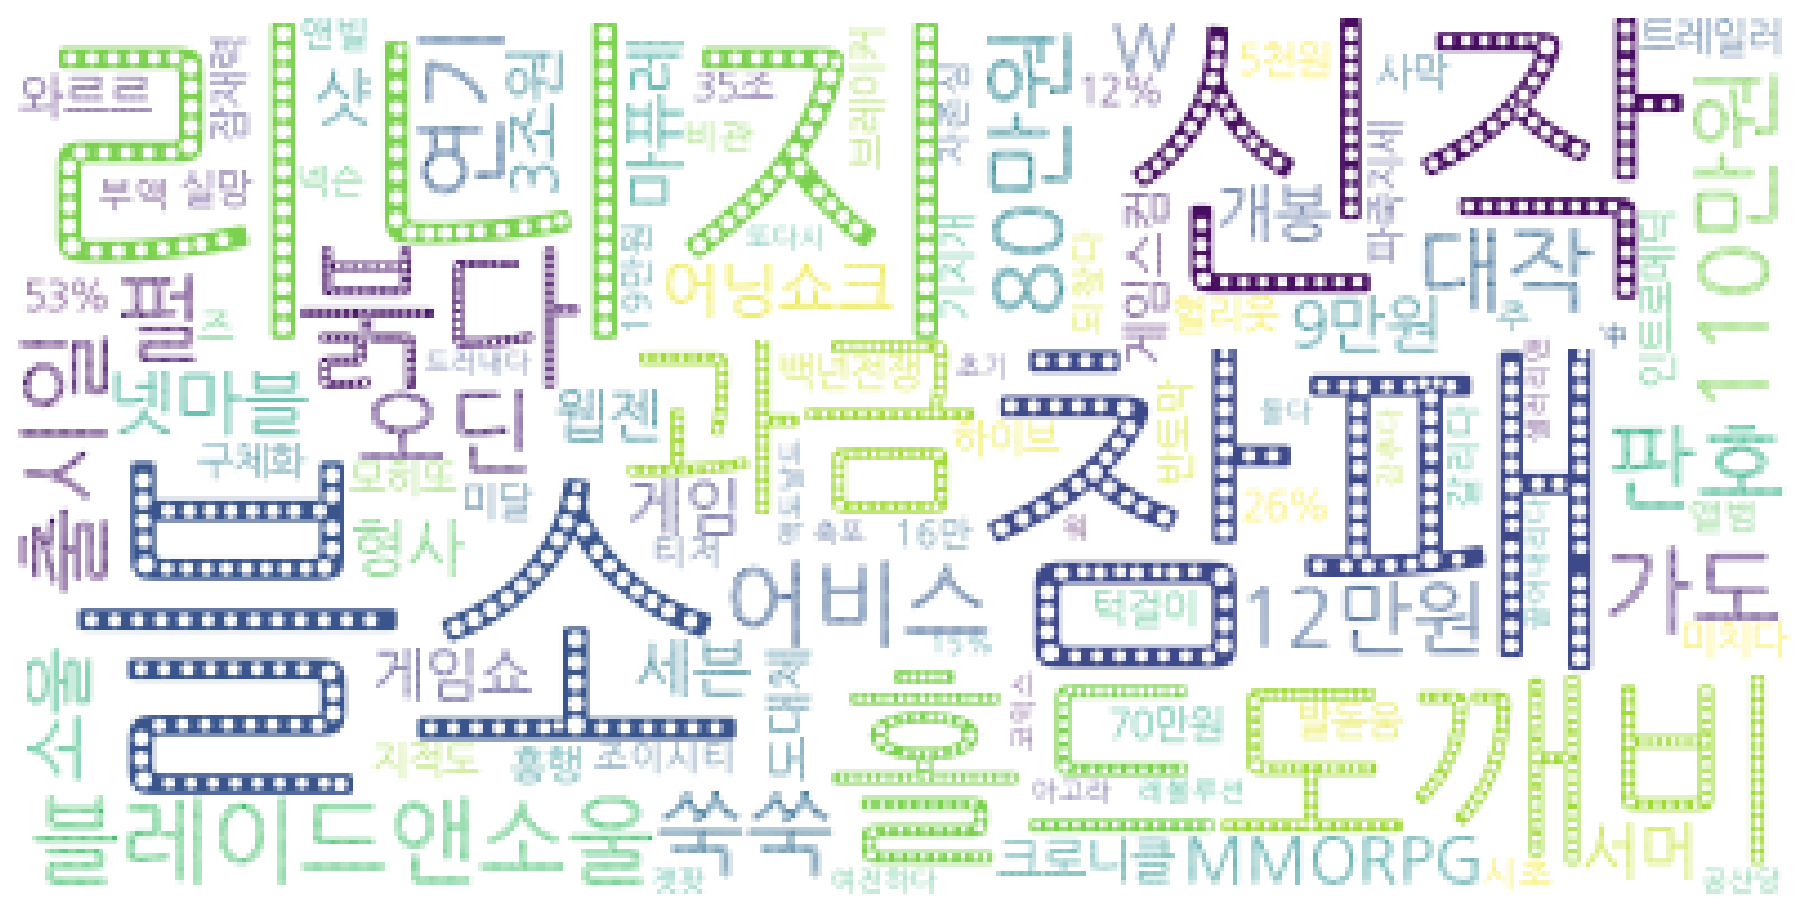

In [72]:
# 엔씨소프트

data = model.wv.most_similar(positive=['엔씨소프트'],topn=100)

cloud = WordCloud(font_path=path, relative_scaling=0.2,
                  background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,12))
plt.imshow(cloud)
plt.axis('off')
plt.show()